PART I:  Study how risk metrics change when combining securities into an equally weighted portfolio

Streamlit Web App: https://portfolio-vs-securities-tracker.streamlit.app/

Github Repo:  https://github.com/Ivanaz916/CSCI_E278/tree/main

PART II.  Study how value factor performs when defined by Free Cash Flow Yield (see WSJ article)

Time period used: 3/31/1985 - 3/31/2025

Periodicity of data: weekly observation

In [2]:
import requests
import pandas as pd

def get_index_constituents(api_key, index):
    """
    Fetch the constituents of a given index using Financial Modeling Prep API.
    
    Parameters:
    api_key (str): Your Financial Modeling Prep API key
    index (str): Index symbol (e.g., "RUSSELL1000" for Russell 1000, "TSX" for TSX)
    
    Returns:
    pd.DataFrame: DataFrame containing the constituents of the index
    """
    # Define the endpoint URL based on the index
    if index == "RUSSELL1000":
        url = f"https://financialmodelingprep.com/api/v3/russell_1000_constituent?apikey={api_key}"
    elif index == "TSX":
        url = f"https://financialmodelingprep.com/api/v3/tsx_constituent?apikey={api_key}"
    elif index == "SP500":
        url = f"https://financialmodelingprep.com/api/v3/sp500_constituent?apikey={api_key}"
    else:
        raise ValueError("Unsupported index symbol")
    
    # Make the API request
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code != 200:
        raise Exception(f"Error fetching data from Financial Modeling Prep API: {response.status_code}")
    
    # Print the response content for debugging
    #print("API Response Content:", response.content)
    
    # Parse the JSON response
    data = response.json()
    
    # Check if the data is empty or not in the expected format
    if not data or not isinstance(data, list):
        raise ValueError("No data returned or data is not in the expected format")
    
    # Convert the data to a DataFrame
    df = pd.DataFrame(data)
    return df

# Example usage
api_key = "koXQKn9g5d174jJu9WH3MgX8sVGQdBOi"  # Replace with your actual API key

# Fetch Russell 1000 constituents
sp500_df = get_index_constituents(api_key, "SP500")
print("SP 500 Constituents:")
print(sp500_df.head())

# Write the DataFrame to a CSV file
sp500_df.to_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/sp500_constituents.csv', index=False)

# Fetch TSX constituents
""" tsx_df = get_index_constituents(api_key, "TSX")
print("\nTSX Constituents:")
print(tsx_df.head()) """

SP 500 Constituents:
  symbol                      name                  sector  \
0   DASH                  DoorDash  Communication Services   
1    EXE             Expand Energy                  Energy   
2    TKO        TKO Group Holdings  Communication Services   
3    WSM           Williams-Sonoma       Consumer Cyclical   
4    APO  Apollo Global Management      Financial Services   

                            subSector              headQuarter dateFirstAdded  \
0      Internet Content & Information        San Francisco, CA     2025-03-24   
1  Oil & Gas Exploration & Production        Oklahoma City, OK     2025-03-24   
2                       Entertainment             New York, NY     2025-03-24   
3                    Specialty Retail        San Francisco, CA     2025-03-24   
4           Asset Management - Global  New York City, New York     2024-12-23   

          cik founded  
0  0001792789    2013  
1  0000895126    1989  
2  0001973266    2023  
3  0000719955    1956  

' tsx_df = get_index_constituents(api_key, "TSX")\nprint("\nTSX Constituents:")\nprint(tsx_df.head()) '

Free Cash Flow Yield for Value Investing

In [3]:
import requests
import pandas as pd

def get_historical_fcf_yield(api_key, ticker, num_quarters=25):
    """
    Fetch historical Free Cash Flow Yield for a given ticker using Financial Modeling Prep API.
    
    Parameters:
    api_key (str): Your Financial Modeling Prep API key
    ticker (str): Stock ticker symbol
    num_quarters (int): Number of quarters to fetch (default is 25)
    
    Returns:
    pd.DataFrame: DataFrame containing historical Free Cash Flow Yield observations
    """
    # Base URL for API
    base_url = "https://financialmodelingprep.com/api/v3"
    
    try:
        # Get historical cash flow statements for the specified number of quarters
        cf_url = f"{base_url}/cash-flow-statement/{ticker}?apikey={api_key}&period=quarter&limit={num_quarters}"
        cf_response = requests.get(cf_url)
        cf_data = cf_response.json()
        
        # Get latest market cap
        quote_url = f"{base_url}/quote/{ticker}?apikey={api_key}"
        quote_response = requests.get(quote_url)
        quote_data = quote_response.json()[0]
        market_cap = quote_data['marketCap']
        
        # Calculate Free Cash Flow Yield for each quarter
        data = []
        for quarter in cf_data:
            operating_cash_flow = quarter['operatingCashFlow']
            capital_expenditure = abs(quarter['capitalExpenditure'])
            free_cash_flow = operating_cash_flow - capital_expenditure
            fcf_yield = (free_cash_flow / market_cap) * 100
            data.append({
                'ticker': ticker,
                'date': quarter['date'],
                'free_cash_flow': free_cash_flow,
                'market_cap': market_cap,
                'fcf_yield': round(fcf_yield, 2),
                'operating_cash_flow': operating_cash_flow,
                'capital_expenditure': capital_expenditure
            })
        
        # Convert the data to a DataFrame
        df = pd.DataFrame(data)
        return df
        
    except Exception as e:
        return pd.DataFrame([{'error': f"Error calculating FCF Yield for {ticker}: {str(e)}"}])
    
    
api_key = "koXQKn9g5d174jJu9WH3MgX8sVGQdBOi"  
sp500_df = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/sp500_constituents.csv')
tickers = sp500_df.symbol  # List of tickers to analyze
    
# Initialize an empty DataFrame to store results
all_results = pd.DataFrame()
    
# Loop through each ticker and get historical FCF Yield
for ticker in tickers:
        result_df = get_historical_fcf_yield(api_key, ticker, num_quarters=25)
        all_results = pd.concat([all_results, result_df], ignore_index=True)
    
# Display the DataFrame
print(all_results)
all_results.to_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/all_results.csv', index=False)


     ticker        date  free_cash_flow    market_cap  fcf_yield  \
0      DASH  2025-03-31    5.610000e+08  8.340980e+10       0.67   
1      DASH  2024-12-31    4.200000e+08  8.340980e+10       0.50   
2      DASH  2024-09-30    4.440000e+08  8.340980e+10       0.53   
3      DASH  2024-06-30    4.510000e+08  8.340980e+10       0.54   
4      DASH  2024-03-31    4.870000e+08  8.340980e+10       0.58   
...     ...         ...             ...           ...        ...   
9536    XOM  2020-03-31    3.290000e+08  4.675097e+11       0.07   
9537    XOM  2019-12-31   -3.520000e+08  4.675097e+11      -0.08   
9538    XOM  2019-09-30    2.794000e+09  4.675097e+11       0.60   
9539    XOM  2019-06-30   -2.260000e+08  4.675097e+11      -0.05   
9540    XOM  2019-03-31    3.139000e+09  4.675097e+11       0.67   

      operating_cash_flow  capital_expenditure error  
0            6.350000e+08         7.400000e+07   NaN  
1            5.180000e+08         9.800000e+07   NaN  
2            5.310

Fill in missing values using LOCF

In [30]:
import requests
import pandas as pd

all_results = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/all_results.csv')

# Using LOCF (Last Observation Carried Forward) as recommended in the document
all_results['fcf_yield'] = all_results['fcf_yield'].fillna(method='ffill')

missing_fcf_yield = all_results['fcf_yield'].isna().sum()
print(f"Missing values in 'fcf_yield' column: {missing_fcf_yield}")


Missing values in 'fcf_yield' column: 0


C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\2527662444.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_results['fcf_yield'] = all_results['fcf_yield'].fillna(method='ffill')


Z Score of FCF Yield (annual grouping, years 2023 and 2024 only)

2023

In [24]:
all_results['year'] = pd.to_datetime(all_results['date']).dt.year
results_2023 = all_results[all_results['year'] ==  2023]

# Calculate the mean and standard deviation of the FCF Yield
mean_fcf_yield = results_2023['fcf_yield'].mean()
std_fcf_yield = results_2023['fcf_yield'].std()
    
# Calculate the z-score manually
results_2023['fcf_yield_zscore'] = (results_2023['fcf_yield'] - mean_fcf_yield) / std_fcf_yield
print(results_2023['fcf_yield_zscore'].head())

year  ticker  date            
2023  ABBV    2023-03-31  4721    0.096777
              2023-06-30  4720    0.337725
              2023-09-30  4719    0.477023
              2023-12-31  4718    0.157014
      ABNB    2023-03-31  594     0.420551
Name: fcf_yield_zscore, dtype: float64


C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\1682215395.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_2023['fcf_yield_zscore'] = (results_2023['fcf_yield'] - mean_fcf_yield) / std_fcf_yield


2024

In [31]:
all_results['year'] = pd.to_datetime(all_results['date']).dt.year
results_2024 = all_results[all_results['year'] ==  2024]

# Calculate the mean and standard deviation of the FCF Yield
mean_fcf_yield = results_2024['fcf_yield'].mean()
std_fcf_yield = results_2024['fcf_yield'].std()
    
# Calculate the z-score manually
results_2024['fcf_yield_zscore'] = (results_2024['fcf_yield'] - mean_fcf_yield) / std_fcf_yield
print(results_2024['fcf_yield_zscore'].head())

0    -0.045100
1    -0.004196
2    -0.024844
3    -0.027991
25   -0.018748
Name: fcf_yield_zscore, dtype: float64


C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\3523652591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_2024['fcf_yield_zscore'] = (results_2024['fcf_yield'] - mean_fcf_yield) / std_fcf_yield


Plot the time series to visually inspect for stationarity

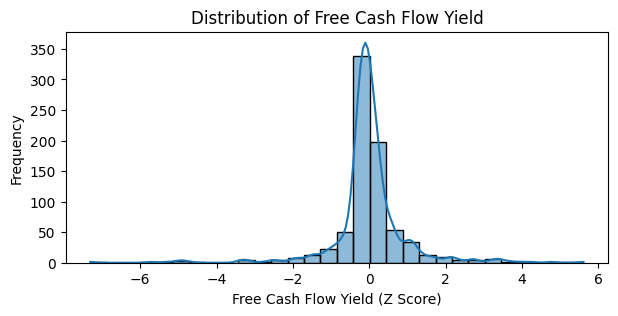

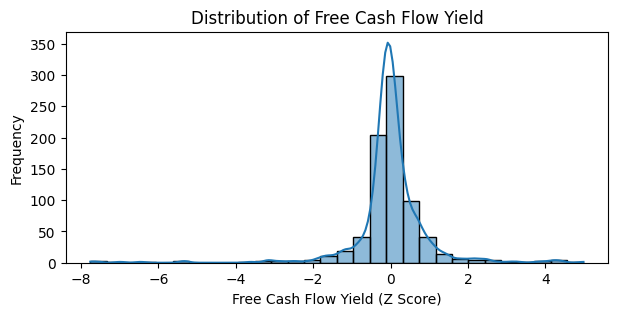

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fcf_yield_distribution(df):
    """
    Plot the distribution of Free Cash Flow Yield.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing FCF Yield data
    """
    plt.figure(figsize=(7, 3))  # Increase the width of the figure
    sns.histplot(df['fcf_yield_zscore'], kde=True, bins=30, kde_kws={'bw_adjust': 0.5})
    plt.title('Distribution of Free Cash Flow Yield')
    plt.xlabel('Free Cash Flow Yield (Z Score)')
    plt.ylabel('Frequency')
    plt.show()

# Plot the distribution of FCF Yield
plot_fcf_yield_distribution(results_2023)
plot_fcf_yield_distribution(results_2024)


Handle Outliers

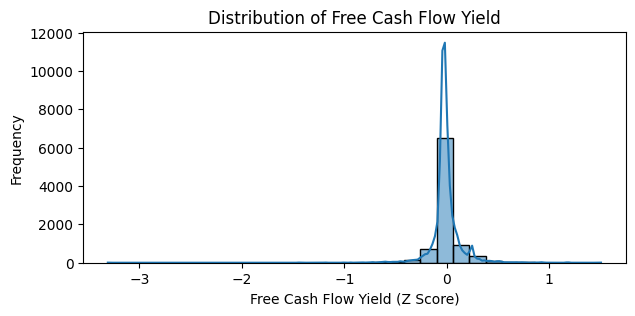

In [ ]:
#Remove BLDR  as its z score is too high
#all_results = all_results[all_results['ticker'] != 'BLDR']

#plot_fcf_yield_distribution(all_results)

Apply Augmented Dickey-Fuller (ADF) ADF Test

In [32]:
from statsmodels.tsa.stattools import adfuller

# Apply the ADF test
result = adfuller(results_2024['fcf_yield_zscore'], autolag='AIC')

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]
n_lags = result[2]


print(adf_statistic)
print(f"P-Value: {p_value:.20f}")
#p-value < 0.05: H0 is rejected → we can condlude the series is stationary
# The more negative ADF stat is, the stronger the rejection of the null hypothesis. You should compare it with the critical values:


-37.56606210666684
P-Value: 0.00000000000000000000


Stationarity is important in time series analysis because many forecasting methods assume that the time series is stationary or can be made stationary through transformations. A stationary time series has constant statistical properties over time (consistent mean, variance, and autocorrelation).

Form portfolios based on FCF Yield factor based on top and bottom 10% sorting, using annual rebalancing (only 2023 and 2024 in this example)

In [39]:
def rank_stocks_by_fcf_yield(df, top_percentile=0.2, bottom_percentile=0.2):
    """
    Rank stocks based on the fcf_yield_zscore within each year and select top and bottom percentiles.

    Parameters:
    df (pd.DataFrame): DataFrame containing FCF Yield data
    top_percentile (float): Top percentile threshold (default is 0.2 for top 20%)
    bottom_percentile (float): Bottom percentile threshold (default is 0.2 for bottom 20%)

    Returns:
    pd.DataFrame: DataFrames containing the top and bottom percentiles
    """
    # Extract year from the 'date' column
    df['year'] = pd.to_datetime(df['date']).dt.year

    # Sort the DataFrame by fcf_yield_zscore in descending order
    df_sorted = df.sort_values(by='fcf_yield_zscore', ascending=False)
    
    # Calculate the number of stocks in the top and bottom percentiles
    num_stocks = len(df_sorted)
    top_threshold = int(num_stocks * top_percentile)
    bottom_threshold = int(num_stocks * bottom_percentile)
    
    # Select the top and bottom percentiles
    top_stocks = df_sorted.head(top_threshold)
    bottom_stocks = df_sorted.tail(bottom_threshold)
    
    return top_stocks, bottom_stocks
    return top_stocks, bottom_stocks

################################
#                              #
#           2024               #
#                              #
################################

# Rank stocks and select top and bottom percentiles - 2024 subset
top_stocks_2024, bottom_stocks_2024 = rank_stocks_by_fcf_yield(results_2024, top_percentile=0.1, bottom_percentile=0.1)


# Get unique tickers from top_stocks and bottom_stocks
unique_top_tickers_2024 = top_stocks_2024['ticker'].unique()
unique_bottom_tickers_2024 = bottom_stocks_2024['ticker'].unique()

# Create DataFrames from unique tickers
unique_top_tickers_df = pd.DataFrame(unique_top_tickers_2024)
unique_top_tickers_df.to_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/top_stocks_2024_annual_rebal.csv', index=False)

unique_bottom_tickers_df = pd.DataFrame(unique_bottom_tickers_2024)
unique_bottom_tickers_df.to_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/bottom_stocks_2024_annual_rebal.csv', index=False)


################################
#                              #
#            2023              #
#                              #
################################


# Rank stocks and select top and bottom percentiles - 2024 subset
top_stocks_2023, bottom_stocks_2023 = rank_stocks_by_fcf_yield(results_2023, top_percentile=0.1, bottom_percentile=0.1)


# Get unique tickers from top_stocks and bottom_stocks
unique_top_tickers_2023 = top_stocks_2023['ticker'].unique()
unique_bottom_tickers_2023 = bottom_stocks_2023['ticker'].unique()

# Create DataFrames from unique tickers
unique_top_tickers_df = pd.DataFrame(unique_top_tickers_2023)
unique_top_tickers_df.to_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/top_stocks_2023_annual_rebal.csv', index=False)

unique_bottom_tickers_df = pd.DataFrame(unique_bottom_tickers_2023)
unique_bottom_tickers_df.to_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/bottom_stocks_2023_annual_rebal.csv', index=False)




C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\289643588.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['date']).dt.year
C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\289643588.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['date']).dt.year


Fetch Weekly Returns and Market Capitalization (All Tickers 2023 and 2024)

Weekly Returns from June 1985 to May 2025

In [42]:
# Load the DataFrames
top_stocks_2024 = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/top_stocks_2024_annual_rebal.csv')
bottom_stocks_2024 = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/bottom_stocks_2024_annual_rebal.csv')
top_stocks_2023 = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/top_stocks_2023_annual_rebal.csv')
bottom_stocks_2023 = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/bottom_stocks_2023_annual_rebal.csv')


# Concatenate all DataFrames
all_stocks = pd.concat([top_stocks_2024, bottom_stocks_2024, top_stocks_2023, bottom_stocks_2023], ignore_index=True)

# Filter out NaN tickers
all_stocks = all_stocks.dropna(subset=['ticker'])

# Get unique tickers
unique_tickers = all_stocks['ticker'].unique()

print(unique_tickers)

['BLDR' 'JPM' 'C' 'NTRS' 'SCHW' 'SYF' 'CTVA' 'OMC' 'EG' 'WBA' 'BG' 'KEY'
 'COF' 'F' 'IPG' 'BAC' 'WBD' 'CE' 'WFC' 'UAL' 'CNC' 'HPE' 'HBAN' 'FITB'
 'GPN' 'APA' 'APTV' 'NCLH' 'ULTA' 'LYB' 'DECK' 'FOX' 'FOXA' 'AMCR' 'CBOE'
 'CAH' 'ACGL' 'TAP' 'ALL' 'MS' 'CI' 'HPQ' 'HIG' 'HUM' 'TGT' 'WRB' 'CVS'
 'MOH' 'HAL' 'PNC' 'RF' 'CAG' 'BEN' 'SWK' 'CFG' 'EIX' 'L' 'BMY' 'SYY'
 'ADM' 'MGM' 'DAL' 'CINF' 'UHS' 'GNRC' 'PNR' 'MRK' 'LDOS' 'SWKS' 'EMN'
 'FSLR' 'HII' 'MTCH' 'DG' 'BALL' 'CPB' 'MO' 'GL' 'PSX' 'DD' 'MHK' 'TROW'
 'LKQ' 'KHC' 'KKR' 'TFX' 'SMCI' 'AWK' 'FE' 'EXC' 'BK' 'AXP' 'LNT' 'CPAY'
 'ATO' 'DTE' 'GM' 'CNP' 'APD' 'DE' 'AEP' 'INTC' 'BA' 'AEE' 'ETR' 'SW'
 'CEG' 'ED' 'EVRG' 'LUV' 'D' 'SRE' 'PCG' 'CMI' 'MMM' 'CMS' 'VRTX' 'LYV'
 'LW' 'CZR' 'ALB' 'INCY' 'MRNA' 'AIG' 'DUK' 'FANG']


In [43]:
import requests
import pandas as pd
import time

def get_weekly_returns_and_market_cap(api_key, ticker):
    """
    Fetch weekly returns and market capitalization for a given ticker using Financial Modeling Prep API.
    
    Parameters:
    api_key (str): Your Financial Modeling Prep API key
    ticker (str): Stock ticker symbol
    
    Returns:
    pd.DataFrame: DataFrame containing weekly returns and market capitalization
    """
    # Fetch historical weekly market data
    url = f"https://financialmodelingprep.com/api/v3/historical-chart/1week/{ticker}?apikey={api_key}"
    response = requests.get(url)
    hist = response.json()
    
    # Convert historical data to DataFrame
    hist_df = pd.DataFrame(hist)
    hist_df['date'] = pd.to_datetime(hist_df['date'])
    hist_df = hist_df.sort_values('date')
    
    # Calculate weekly returns
    hist_df['return'] = hist_df['close'].pct_change()
    
    # Fetch the latest market capitalization
    quote_url = f"https://financialmodelingprep.com/api/v3/quote/{ticker}?apikey={api_key}"
    quote_response = requests.get(quote_url)
    quote_data = quote_response.json()[0]
    shares_outstanding = quote_data.get('sharesOutstanding', None)
    
    # Calculate weekly market capitalization if shares outstanding is available
    if shares_outstanding:
        hist_df['market_cap'] = hist_df['close'] * shares_outstanding
    else:
        hist_df['market_cap'] = None  # Set to None if shares outstanding is not available
    
    # Create DataFrame with weekly returns and market capitalization
    data = {
        'date': hist_df['date'],
        'ticker': ticker,
        'close': hist_df['close'],
        'return': hist_df['return'],
        'shaers_outstanding': shares_outstanding,
        'market_cap': hist_df['market_cap']
    }
    df = pd.DataFrame(data).dropna()
    return df

# Example usage
api_key = "koXQKn9g5d174jJu9WH3MgX8sVGQdBOi"  

# Assuming top_stocks and bottom_stocks DataFrames are already defined
# Combine tickers from top_stocks and bottom_stocks
#tickers = pd.concat([unique_top_tickers_df['ticker'], unique_bottom_tickers_df['ticker']])
#tickers = unique_top_tickers_df['ticker'] 

# Initialize an empty DataFrame to store results
weekly_rors = pd.DataFrame()

# Loop through each ticker and get weekly returns and market capitalization
for ticker in unique_tickers:
    try:
        ror_df = get_weekly_returns_and_market_cap(api_key, ticker)
        weekly_rors = pd.concat([weekly_rors, ror_df], ignore_index=True)
        time.sleep(25)  # Introduce a delay of 30 seconds between requests
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        time.sleep(60)  # Introduce a longer delay if an error occurs

# Display the DataFrame
print(weekly_rors)

# Save the DataFrame to a CSV file
weekly_rors.to_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/all_2023_2024_tickers_weekly_rors_marketcap.csv', index=False)

Error fetching data for APA: HTTPSConnectionPool(host='financialmodelingprep.com', port=443): Max retries exceeded with url: /api/v3/historical-chart/1week/APA?apikey=koXQKn9g5d174jJu9WH3MgX8sVGQdBOi (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001277C7164D0>: Failed to resolve 'financialmodelingprep.com' ([Errno 11001] getaddrinfo failed)"))
             date ticker   close    return  shaers_outstanding    market_cap
0      2005-06-27   BLDR   16.24  0.057980           110515000  1.794764e+09
1      2005-07-04   BLDR   16.20 -0.002463           110515000  1.790343e+09
2      2005-07-11   BLDR   16.23  0.001852           110515000  1.793658e+09
3      2005-07-18   BLDR   16.60  0.022797           110515000  1.834549e+09
4      2005-07-25   BLDR   20.00  0.204819           110515000  2.210300e+09
...           ...    ...     ...       ...                 ...           ...
200521 2025-04-07   FANG  129.01  0.045716           294083000  3.793965e+10
2

Calculate Top and Bottom Annualized Returns Based on 2024 Top and Bottom Tickers

In [57]:
import numpy as np

weekly_rors = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/all_2023_2024_tickers_weekly_rors_marketcap.csv')

# Ensure the 'market_cap' and 'return' columns are numeric
weekly_rors['market_cap'] = pd.to_numeric(weekly_rors['market_cap'], errors='coerce')
weekly_rors['return'] = pd.to_numeric(weekly_rors['return'], errors='coerce')

# Drop rows with missing values in 'market_cap' or 'return'
weekly_rors = weekly_rors.dropna(subset=['market_cap', 'return'])
# Convert 'date' column to datetime objects
weekly_rors['date'] = pd.to_datetime(weekly_rors['date'])

top_tickers_2024_df = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/top_stocks_2024_annual_rebal.csv')
bottom_tickers_2024_df = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/bottom_stocks_2024_annual_rebal.csv')


################################
#                              #
#           TOP                #
#                              #
################################


# Extract the list of tickers from top_tickers_2024_df
top_tickers_2024 = top_tickers_2024_df['ticker'].tolist()

# Filter value_weighted_returns to include only tickers in top_tickers_2024
weekly_rors_top = weekly_rors[weekly_rors['ticker'].isin(top_tickers_2024)]

# Function to calculate geometric mean weekly return and annualized return
def calculate_geometric_mean_annualized_return(group):
    total_weeks = len(group['date'].unique())
    product_of_returns = np.prod(1 + group['return'])
    geometric_mean_weekly_return = product_of_returns ** (1 / total_weeks) - 1
    annualized_return_geometric = (1 + geometric_mean_weekly_return) ** 52 - 1
    return annualized_return_geometric

# Group by ticker and calculate geometric mean annualized return
grouped_returns = weekly_rors_top.groupby('ticker').apply(
    calculate_geometric_mean_annualized_return
)

print("Annualized Returns (Geometric Mean) by Ticker - Top:")
print(grouped_returns)

# Calculate the market-cap-weighted average of the annualized returns
# First, get the market cap for each ticker at the maximum date
max_date_market_caps = (
    weekly_rors_top.groupby('ticker')
    .apply(lambda x: x.loc[x['date'].idxmax(), 'market_cap'])
)
# Next, align the market caps with the grouped returns
aligned_market_caps = max_date_market_caps.reindex(grouped_returns.index)

# Calculate the weights based on market cap
weights = aligned_market_caps / aligned_market_caps.sum()

# Calculate the market-cap-weighted average return
market_cap_weighted_return = np.sum(grouped_returns * weights)

print(
    f"Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Top: {market_cap_weighted_return:.3%}"
)


################################
#                              #
#           BOTTOM             #
#                              #
################################

# Extract the list of tickers from top_tickers_2024_df
bottom_tickers_2024 = bottom_tickers_2024_df['ticker'].tolist()

# Filter value_weighted_returns to include only tickers in top_tickers_2024
weekly_rors_bottom = weekly_rors[weekly_rors['ticker'].isin(bottom_tickers_2024)]

# Function to calculate geometric mean weekly return and annualized return
def calculate_geometric_mean_annualized_return(group):
    total_weeks = len(group['date'].unique())
    product_of_returns = np.prod(1 + group['return'])
    geometric_mean_weekly_return = product_of_returns ** (1 / total_weeks) - 1
    annualized_return_geometric = (1 + geometric_mean_weekly_return) ** 52 - 1
    return annualized_return_geometric

# Group by ticker and calculate geometric mean annualized return
grouped_returns = weekly_rors_bottom.groupby('ticker').apply(
    calculate_geometric_mean_annualized_return
)

print("Annualized Returns (Geometric Mean) by Ticker - Bottom:")
print(grouped_returns)

# Calculate the market-cap-weighted average of the annualized returns
# First, get the market cap for each ticker at the maximum date
max_date_market_caps = (
    weekly_rors_bottom.groupby('ticker')
    .apply(lambda x: x.loc[x['date'].idxmax(), 'market_cap'])
)
# Next, align the market caps with the grouped returns
aligned_market_caps = max_date_market_caps.reindex(grouped_returns.index)

# Calculate the weights based on market cap
weights = aligned_market_caps / aligned_market_caps.sum()

# Calculate the market-cap-weighted average return
market_cap_weighted_return = np.sum(grouped_returns * weights)

print(
    f"Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Bottom: {market_cap_weighted_return:.3%}"
)




Annualized Returns (Geometric Mean) by Ticker - Top:
ticker
ACGL    0.132068
ADM     0.074217
ALL     0.086246
AMCR   -0.030103
APTV    0.106176
          ...   
ULTA    0.153055
WBA     0.047134
WBD     0.006517
WFC     0.110853
WRB     0.149808
Length: 85, dtype: float64
Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Top: 8.219%
Annualized Returns (Geometric Mean) by Ticker - Bottom:
ticker
AEE     0.042466
AEP     0.038801
AIG     0.007086
ALB     0.072685
AMCR   -0.030103
          ...   
TROW    0.125216
UAL     0.046904
VRTX    0.143557
WBA     0.047134
WFC     0.110853
Length: 79, dtype: float64
Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Bottom: 9.340%


C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\4077475248.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_returns = weekly_rors_top.groupby('ticker').apply(
C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\4077475248.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['date'].idxmax(), 'market_cap'])
C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\4077475248.py:8

Analysis:

For 2024, the Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Top: 8.219%

For 2024, Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Bottom: 9.340%

The Top Decile - Bottom Decile spread = -1.12%

I also compared this against Ken French daily returns of portfolios sorted by Book-to-Market (B/M) ratio from https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html.  Using the daily returns, I calculated geometric mean for 2024 from the top decile B/M ratio and bottom decile B/M ratio and found following results:

For 2024, the Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Top: 20.77%
For 2024, Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Bottom: 34.9%

The Top Decile - Bottom Decile spread = -14.13%

Although my results are less extreme - in both cases when a value factor is built via Free Cash Flow Yield, or via Book-to-Market, value has underperformed in 2024.



Calculate Top and Bottom Annualized Returns Based on 2023 Top and Bottom Tickers

In [59]:
import numpy as np

weekly_rors = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/all_2023_2024_tickers_weekly_rors_marketcap.csv')

# Ensure the 'market_cap' and 'return' columns are numeric
weekly_rors['market_cap'] = pd.to_numeric(weekly_rors['market_cap'], errors='coerce')
weekly_rors['return'] = pd.to_numeric(weekly_rors['return'], errors='coerce')

# Drop rows with missing values in 'market_cap' or 'return'
weekly_rors = weekly_rors.dropna(subset=['market_cap', 'return'])
# Convert 'date' column to datetime objects
weekly_rors['date'] = pd.to_datetime(weekly_rors['date'])

top_tickers_2023_df = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/top_stocks_2023_annual_rebal.csv')
bottom_tickers_2023_df = pd.read_csv('C:/Users/ivana/Google Drive (ivana.rocci131@gmail.com)/Harvard_2024/cscie278/final_project/data/bottom_stocks_2023_annual_rebal.csv')


################################
#                              #
#           TOP                #
#                              #
################################


# Extract the list of tickers from top_tickers_2023_df
top_tickers_2023 = top_tickers_2023_df['ticker'].tolist()

# Filter value_weighted_returns to include only tickers in top_tickers_2023
weekly_rors_top = weekly_rors[weekly_rors['ticker'].isin(top_tickers_2023)]

# Function to calculate geometric mean weekly return and annualized return
def calculate_geometric_mean_annualized_return(group):
    total_weeks = len(group['date'].unique())
    product_of_returns = np.prod(1 + group['return'])
    geometric_mean_weekly_return = product_of_returns ** (1 / total_weeks) - 1
    annualized_return_geometric = (1 + geometric_mean_weekly_return) ** 52 - 1
    return annualized_return_geometric

# Group by ticker and calculate geometric mean annualized return
grouped_returns = weekly_rors_top.groupby('ticker').apply(
    calculate_geometric_mean_annualized_return
)

print("Annualized Returns (Geometric Mean) by Ticker - Top:")
print(grouped_returns)

# Calculate the market-cap-weighted average of the annualized returns
# First, get the market cap for each ticker at the maximum date
max_date_market_caps = (
    weekly_rors_top.groupby('ticker')
    .apply(lambda x: x.loc[x['date'].idxmax(), 'market_cap'])
)
# Next, align the market caps with the grouped returns
aligned_market_caps = max_date_market_caps.reindex(grouped_returns.index)

# Calculate the weights based on market cap
weights = aligned_market_caps / aligned_market_caps.sum()

# Calculate the market-cap-weighted average return
market_cap_weighted_return = np.sum(grouped_returns * weights)

print(
    f"Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Top: {market_cap_weighted_return:.3%}"
)


################################
#                              #
#           BOTTOM             #
#                              #
################################

# Extract the list of tickers from top_tickers_2023_df
bottom_tickers_2023 = bottom_tickers_2023_df['ticker'].tolist()

# Filter value_weighted_returns to include only tickers in top_tickers_2023
weekly_rors_bottom = weekly_rors[weekly_rors['ticker'].isin(bottom_tickers_2023)]

# Function to calculate geometric mean weekly return and annualized return
def calculate_geometric_mean_annualized_return(group):
    total_weeks = len(group['date'].unique())
    product_of_returns = np.prod(1 + group['return'])
    geometric_mean_weekly_return = product_of_returns ** (1 / total_weeks) - 1
    annualized_return_geometric = (1 + geometric_mean_weekly_return) ** 52 - 1
    return annualized_return_geometric

# Group by ticker and calculate geometric mean annualized return
grouped_returns = weekly_rors_bottom.groupby('ticker').apply(
    calculate_geometric_mean_annualized_return
)

print("Annualized Returns (Geometric Mean) by Ticker - Bottom:")
print(grouped_returns)

# Calculate the market-cap-weighted average of the annualized returns
# First, get the market cap for each ticker at the maximum date
max_date_market_caps = (
    weekly_rors_bottom.groupby('ticker')
    .apply(lambda x: x.loc[x['date'].idxmax(), 'market_cap'])
)
# Next, align the market caps with the grouped returns
aligned_market_caps = max_date_market_caps.reindex(grouped_returns.index)

# Calculate the weights based on market cap
weights = aligned_market_caps / aligned_market_caps.sum()

# Calculate the market-cap-weighted average return
market_cap_weighted_return = np.sum(grouped_returns * weights)

print(
    f"Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Bottom: {market_cap_weighted_return:.3%}"
)




Annualized Returns (Geometric Mean) by Ticker - Top:
ticker
ACGL    0.132068
ALB     0.072685
AMCR   -0.030103
ATO     0.075147
BG      0.068312
BLDR    0.104155
CBOE    0.144075
CFG     0.050052
CNC     0.176131
CPAY    0.185383
CTVA    0.152548
CZR     0.065859
DAL     0.047399
DECK    0.156219
EG      0.101209
FOX     0.037050
FOXA   -0.001181
GM      0.022760
GNRC    0.186751
HII     0.133433
HPE     0.057587
KHC    -0.097597
LDOS    0.062922
LKQ     0.151648
LYV     0.133466
MGM     0.068837
MHK     0.086416
MOH     0.154801
MRNA    0.042033
MTCH    0.144151
NCLH   -0.026917
SW     -0.018398
SWKS    0.076273
SYF     0.085154
UAL     0.046904
ULTA    0.153055
WBD     0.006517
WRB     0.149808
dtype: float64
Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Top: 8.094%
Annualized Returns (Geometric Mean) by Ticker - Bottom:
ticker
ALB     0.072685
AMCR   -0.030103
ATO     0.075147
AWK     0.119997
BG      0.068312
CBOE    0.144075
CEG     0.721550
CTVA    0.152548
CZR

C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\1125324133.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_returns = weekly_rors_top.groupby('ticker').apply(
C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\1125324133.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['date'].idxmax(), 'market_cap'])
C:\Users\ivana\AppData\Local\Temp\ipykernel_24708\1125324133.py:8

Analysis:

For 2023, the Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Top: 8.094%

For 2023, Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Bottom: 12.977%

The Top Decile - Bottom Decile spread = -4.88%

I also compared this against Ken French daily returns of portfolios sorted by Book-to-Market (B/M) ratio from https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html.  Using the daily returns, I calculated geometric mean for 2024 from the top decile B/M ratio and bottom decile B/M ratio and found following results:

For 2023, the Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Top: 6.7%
For 2023, Market-Cap-Weighted Average Annualized Return (Geometric Mean) - Bottom: 47.77%

The Top Decile - Bottom Decile spread = -41.067%

In 2023 value factor even more extremely underperformed growth.  It was quite shocking to see such a large delta using the French data set.  

Further Analysis is certainly required to make a sound judgement about value factor in years 2023 and 2024.  Other analysis I will consider is calculating sharepe, max drawdown of a portfolio constructed by going long the top decile and short the bottom decile.  I would also like to run a similar analysis for other metrics used to for value factor beside solely book-to-market and free cash flow yield.